## Get the Data

Run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com)

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [5]:
df = pd.read_csv('602 QueryResults.csv')

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [6]:
df.head()

,Date,Language,Reference
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,163
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [7]:
df.shape

(2132, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [8]:
df['Reference'].count()

2132

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [9]:
df.groupby('Language').sum().sort_values('Reference', ascending=False)

,Reference
Language,
javascript,2219111
java,1775253
python,1724166
c#,1479323
php,1401859
c++,725269
r,404317
c,358908
swift,295950


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [10]:
df.groupby('Language').count().sort_values('Reference', ascending=False)

,Date,Reference
Language,,
c#,155,155
assembly,154,154
c,154,154
c++,154,154
delphi,154,154
java,154,154
javascript,154,154
perl,154,154
php,154,154


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Language,Reference
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,163
3,2008-08-01,c,85
4,2008-08-01,python,124


In [12]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df


,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


In [13]:
pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


In [14]:
reshaped_df = df.pivot(index='Date', columns='Language', values='Reference')
reshaped_df

Language,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,509.0,164.0,14.0,NaN,222.0,163.0,28.0,161.0,124.0,NaN,72.0,NaN
2008-09-01,28.0,320.0,1650.0,754.0,105.0,NaN,1136.0,639.0,131.0,481.0,541.0,6.0,289.0,NaN
2008-10-01,15.0,303.0,1990.0,811.0,112.0,NaN,1153.0,726.0,127.0,615.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,580.0,97.0,503.0,452.0,1.0,159.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01,333.0,2759.0,6978.0,4544.0,211.0,606.0,9629.0,19699.0,146.0,5721.0,26575.0,5024.0,589.0,2781.0
2021-02-01,256.0,2365.0,6612.0,4489.0,203.0,631.0,9219.0,18064.0,134.0,5296.0,25126.0,5009.0,604.0,2734.0
2021-03-01,341.0,2672.0,7352.0,4762.0,271.0,830.0,10494.0,19931.0,154.0,5633.0,28348.0,6051.0,571.0,2921.0


In [15]:
reshaped_df.fillna(0, inplace=True)
reshaped_df.isna().values.any()
reshaped_df

Language,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,509.0,164.0,14.0,0.0,222.0,163.0,28.0,161.0,124.0,0.0,72.0,0.0
2008-09-01,28.0,320.0,1650.0,754.0,105.0,0.0,1136.0,639.0,131.0,481.0,541.0,6.0,289.0,0.0
2008-10-01,15.0,303.0,1990.0,811.0,112.0,0.0,1153.0,726.0,127.0,615.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1733.0,734.0,141.0,0.0,958.0,580.0,97.0,503.0,452.0,1.0,159.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01,333.0,2759.0,6978.0,4544.0,211.0,606.0,9629.0,19699.0,146.0,5721.0,26575.0,5024.0,589.0,2781.0
2021-02-01,256.0,2365.0,6612.0,4489.0,203.0,631.0,9219.0,18064.0,134.0,5296.0,25126.0,5009.0,604.0,2734.0
2021-03-01,341.0,2672.0,7352.0,4762.0,271.0,830.0,10494.0,19931.0,154.0,5633.0,28348.0,6051.0,571.0,2921.0


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

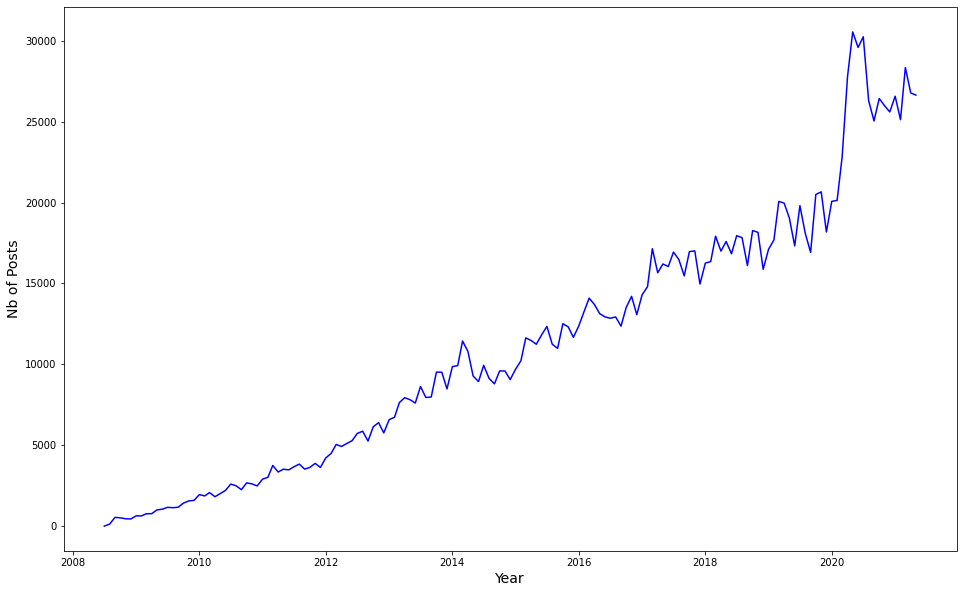

In [38]:
plt.figure(figsize=(16,10))
plt.xlabel('Year', fontsize=14)
plt.ylabel('Nb of Posts', fontsize=14)
plt.plot(reshaped_df.index, reshaped_df['python'], 'b')

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

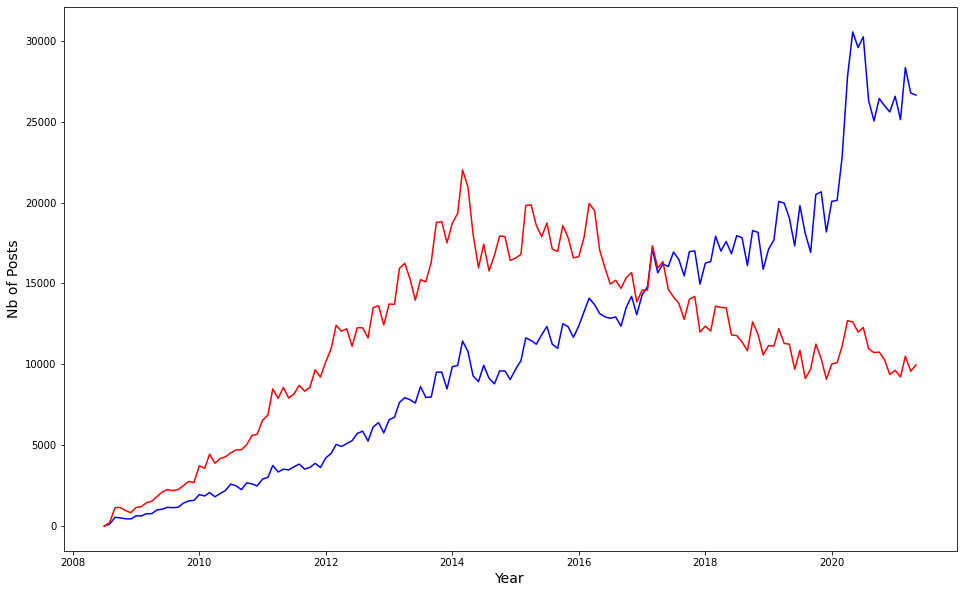

In [40]:
plt.figure(figsize=(16,10))
plt.xlabel('Year', fontsize=14)
plt.ylabel('Nb of Posts', fontsize=14)
plt.plot(reshaped_df.index, reshaped_df['python'], 'b')
plt.plot(reshaped_df.index, reshaped_df['java'], 'r')

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 